In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Eda

convertting numeric column Taxable.income into categorical columns

In [5]:
df["Taxable.Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [6]:
df["Taxable.Income"] = pd.cut(df["Taxable.Income"], bins = [0,30000,9962000], labels = ["Risky", "Good"])

In [7]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [34]:
m = df["Taxable.Income"].value_counts()
m

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

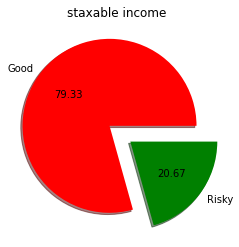

In [35]:
plt.pie(m,colors=["red","green"],autopct="%0.2f",labels=["Good","Risky"],explode=(0.1,0.2),
       shadow=True)

plt.title("staxable income")
plt.show()

In [11]:
# pd.get_dummies  to handle the categorical columns

In [13]:
df1=pd.get_dummies(df)
df1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable.Income_Risky,Taxable.Income_Good,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1,0,1
1,134075,18,0,1,1,0,0,0,1,0,1
2,160205,30,1,0,0,1,0,0,1,0,1
3,193264,15,0,1,0,0,1,0,1,0,1
4,27533,28,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,0,1
596,55369,2,0,1,1,0,0,0,1,0,1
597,154058,0,1,0,1,0,0,0,1,0,1
598,180083,17,0,1,0,1,0,0,1,1,0


In [29]:
df2=df1.iloc[:,[0,1,3,5,7,10]]
df2

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Taxable.Income_Risky,Urban_YES
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [30]:
df2.isnull().sum()

City.Population           0
Work.Experience           0
Undergrad_YES             0
Marital.Status_Married    0
Taxable.Income_Risky      0
Urban_YES                 0
dtype: int64

In [31]:
# checking for collinearity
import seaborn as sns

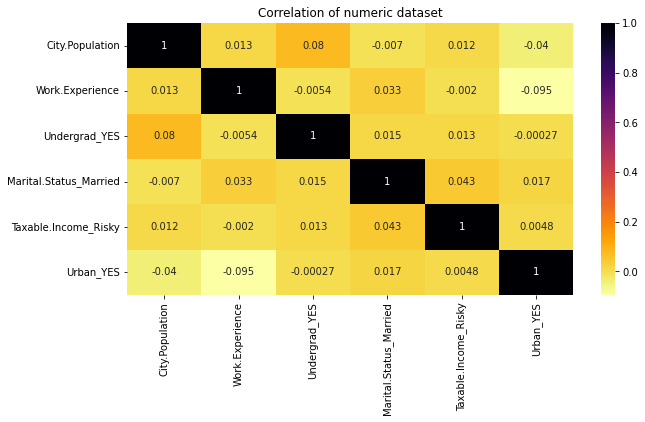

In [32]:
a = df2.corr()
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap="inferno_r")
plt.title("Correlation of numeric dataset")
plt.show()

In [33]:
# no collinearity problem

# split target and features

In [36]:
df2.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Taxable.Income_Risky,Urban_YES
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0


In [38]:
X=df2.iloc[:,[0,1,2,3,5]]
y=df2.iloc[:,4]

In [40]:
#  standarization is not required

# Train and test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=7)

# Base model creation

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

# Model validation confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[111,   8],
       [ 30,   1]], dtype=int64)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       119
           1       0.11      0.03      0.05        31

    accuracy                           0.75       150
   macro avg       0.45      0.48      0.45       150
weighted avg       0.65      0.75      0.69       150



In [47]:
accuracy_score(y_test,y_pred)

0.7466666666666667

In [48]:
y_pred1 = model.predict(X_train)
accuracy_score(y_train,y_pred1)

0.9977777777777778

# KFold testing

In [49]:
from sklearn.model_selection import KFold,cross_val_score

In [50]:
fold = KFold(n_splits=10,shuffle=False)

In [51]:
model1 = RandomForestClassifier()

results = cross_val_score(model,X,y,cv = fold)

In [52]:
results

array([0.76666667, 0.68333333, 0.7       , 0.7       , 0.73333333,
       0.66666667, 0.83333333, 0.73333333, 0.73333333, 0.78333333])

In [53]:
results.mean(), results.max() ,results.min()

(0.7333333333333333, 0.8333333333333334, 0.6666666666666666)

In [54]:
results.std()

0.0477260702109212

# Grid search Hyperparameter tuning 

In [56]:
model2 = RandomForestClassifier()
param={"n_estimators":[100,180,200,250],"criterion":['gini','entropy'],"max_depth":[4,5,6,7,8,9,10]}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid=GridSearchCV(model2,param_grid=param,cv=KFold(n_splits=10))

In [59]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 180, 200, 250]})

In [60]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}

In [61]:
grid.best_score_

0.7933333333333332

In [62]:
means=grid.cv_results_['mean_test_score']
stds=grid.cv_results_['std_test_score']
params=grid.cv_results_['params']

In [63]:
for mean,stds,params in zip(means,stds,params):
    print('{},{} with: {}'.format(means,stds,params))

[0.79333333 0.79333333 0.79333333 0.79333333 0.79166667 0.79333333
 0.79333333 0.79166667 0.79333333 0.79       0.79333333 0.79
 0.78666667 0.785      0.79       0.78833333 0.77833333 0.77666667
 0.775      0.77666667 0.76833333 0.77       0.775      0.76666667
 0.75666667 0.765      0.76166667 0.76166667 0.79333333 0.79333333
 0.79333333 0.79333333 0.79333333 0.79333333 0.79333333 0.79333333
 0.79333333 0.79333333 0.79333333 0.79333333 0.79       0.79166667
 0.79166667 0.79       0.78333333 0.78333333 0.78166667 0.785
 0.775      0.77166667 0.77666667 0.77333333 0.76166667 0.765
 0.76166667 0.77166667],0.06289320754704403 with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}
[0.79333333 0.79333333 0.79333333 0.79333333 0.79166667 0.79333333
 0.79333333 0.79166667 0.79333333 0.79       0.79333333 0.79
 0.78666667 0.785      0.79       0.78833333 0.77833333 0.77666667
 0.775      0.77666667 0.76833333 0.77       0.775      0.76666667
 0.75666667 0.765      0.76166667 0.761666

# Final model

In [64]:
from sklearn.model_selection import KFold,cross_val_score
fold=KFold(n_splits=10)

In [66]:
final_model=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=4)
final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4)

In [67]:
final_result=cross_val_score(final_model,X,y,cv=fold)

In [68]:
final_result

array([0.78333333, 0.76666667, 0.71666667, 0.75      , 0.81666667,
       0.71666667, 0.9       , 0.75      , 0.85      , 0.88333333])

In [70]:
final_result.mean() , final_result.std()

(0.7933333333333332, 0.06289320754704403)

In [71]:
y_pred=final_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7933333333333333

In [72]:
# accuraccy increases from 74.6 to 79.3